# **A step-by-step guide to plot binding energy per nucleon curve using Weizacker formula in Python**

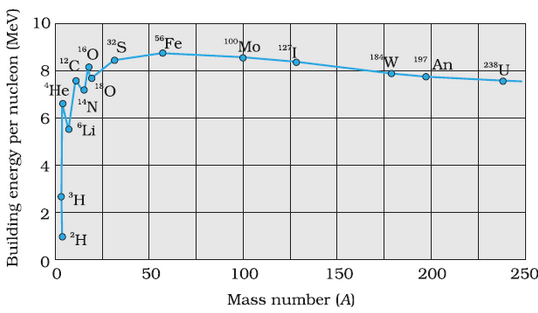

To plot this curve, we need to find the binding energy per nucleon for mass numbers ranging from 1 to 250 (or any value).

Before that, take a sample A value (say 56) and try to calculate the binding energy per nucleon for that single A value. For that, we can use the Weizacker formula.

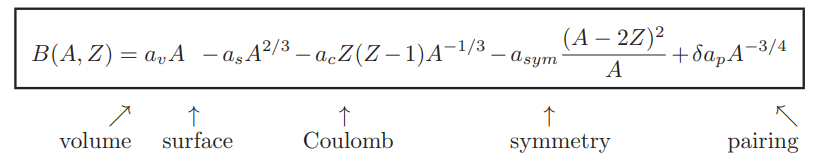

But here we can see that the Weizacker formula has two variables - mass number (A) and atomic number (Z). We must find the corresponding Z value for our A value first and then use both of them in the formula.

To find the minimum Z value for an A value for which the nucleus is stable, we can use the following formula(It is obtained by differentiating Weizacker formulae with respect to Z and equating it to zero):

In [1]:
acol=0.595  #value of coefficents
asym=19

A=56 #sample A value

Zmin=(A/2)*(1/(1+0.25*(A**(2/3))*(acol/asym)))
print (Zmin)

25.121253849742


Value of Z cannot be a float (fraction). It must be an integer.

In [3]:
acol=0.595  #value of coefficents
asym=19

A=56 #sample A value

Zmin=(A/2)*(1/(1+0.25*(A**(2/3))*(acol/asym)))
Z=int(Zmin)   #int() converts float values into integers
print (Z)

25


We can plug this Z and A value to the formula, but there is a problem regarding the **paring coefficent**.

apar = +33 if both A and Z are even
apar = -33 if both A and Z are odd
apar = 0 if either A or Z is odd

We can determine if a given number is odd or even by taking the reminder after dividing it with 2. If the reminder is 0, the number is even and if it is not 0, it is odd. For example:

In [5]:
x=27
                # % (Modulus operator) means 'take the reminder after dividng it
                # with the follwing number'.
                # == means 'check it the LHS is EQUAL to the RHS'
                # != means 'check it the LHS is NOT EQUAL to the RHS'
                #elif meand 'else if'
if x%2==0:
  print("Even")
elif x%2!=2:
  print("Odd")

Odd


In [ ]:
#So the condition of the paring coefficent can be coded as:

    if (A%2)==0 and (Z%2)==0:
        apar=33.5
    elif (A%2)!=0 and (Z%2)!=0:
        apar=-33.5
    elif (A%2)!=0 and (Z%2)==0:
        apar=0
    elif (A%2)==0 and (Z%2)!=0:
        apar=0

Therefore, the bindind energy for a value of A can be calculated as:

In [6]:
A=56

avol=14.1       #Initializing the coefficents
asurf=13
acol=0.595
asym=19

Z=(A/2)*(1/(1+0.25*(A**(2/3))*(acol/asym)))
Z=int(Z)

if (A%2)!=0 and (Z%2)==0:
  apar=0
elif (A%2)==0 and (Z%2)!=0:
  apar=0
elif (A%2)==0 and (Z%2)==0:
  apar=33.5
elif (A%2)!=0 and (Z%2)!=0:
  apar=-33.5

b=avol*A-asurf*(A**(2/3))-(acol*Z*(Z-1))/(A**(1/3))-asym*((A-2*Z)**2)/A+apar/(A**(3/4))

print(b/A) #binding energy per nucleon

8.817670031409536


For the ease of use, let's pack everything up into a nice package. Let's define a fucntion called 'binding_energy()'such that it will return (output) the binding energy for any A value we provide to it as an argument (The thing or things that are inside the bracket of a function)

In [7]:
def binding_energy(A):  #Defining a function to calculate binding energy
                  #curve using semi-emperical mass formulae
    avol=14.1      #Initializing the coefficents
    asurf=13
    acol=0.595
    asym=19

    Z=(A/2)*(1/(1+0.25*(A**(2/3))*(acol/asym)))
    Z=int(Z)
    if (A%2)!=0 and (Z%2)==0:
        apar=0
    elif (A%2)==0 and (Z%2)!=0:
        apar=0
    elif (A%2)==0 and (Z%2)==0:
        apar=33.5
    elif (A%2)!=0 and (Z%2)!=0:
        apar=-33.5

    b = avol*A-asurf*(A**(2/3))-(acol*Z*(Z-1))/(A**(1/3))-asym*((A-2*Z)**2)/A+apar/(A**(3/4))

    return b/A

A=56 #sample A value

''' Now, we  will 'call' the function and provide A(=56) as the argument
    It will return (output) b/A for that A value
    We will store that returned value in teh variable be'''

be = binding_energy(A)

print(be)

8.817670031409536


We now need to do this for a lot of A values (1 to 300)
Lets create an array - a series of boxes that are indexed (named) starting from 0, that can hold our A values.

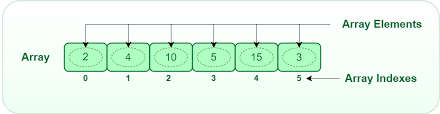

We can do this a lot of ways. The one that is most suitable for out task is to use the **arange()** function from **numpy** module. The syntax of arange() is:

arange(start, end+1, stepsize)

In [11]:
import numpy as np #we must first import numpy to use it.

A = np.arange(1, 10, 1) #we must call arange() from the numpy module
B = np.arange(1, 11, 1)
C = np.arange(0, 11, 2)

print(A)
print(B)
print(C)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]
[ 0  2  4  6  8 10]


In [17]:
import numpy as np

A = np.arange(1, 10, 1)
#We can call a specific entry in an array using it's index.
print(A[5])

#Suppose we need to print the first 4 entries in an array. We can use a loop.

for i in range(4):  #range() determines the number of times a loop is executed.
  print(A[i])       #i is just a dummy variable to be used as the index.

#Suppose we need to square every value of A before printing it.

for i in range(len(A)):  #len() provides the length of the array. ie. we are executing
  print(A[i]**2)    #from the start to the end of the array.
                    # ** means 'raised to'

#Suppose we needed to find the cube of evergy value and store it in another array.

cube=[] #first we must define an empty array
for i in range(len(A)):
  c=A[i]**3
  cube.append(c) #.append() will add the values to the array.

print(cube)

6
1
2
3
4
1
4
9
16
25
36
49
64
81
[1, 8, 27, 64, 125, 216, 343, 512, 729]


Now we can find the binding energy per nucleon corresponding to range of A values.

In [19]:
import numpy as np

def bind_en (A):
    avol=14.1
    asurf=13
    acol=0.595
    asym=19

    Z=(A/2)*(1/(1+0.25*(A**(2/3))*(acol/asym)))
    Z=int(Z)
    if (A%2)!=0 and (Z%2)==0:
        apar=0
    elif (A%2)==0 and (Z%2)!=0:
        apar=0
    elif (A%2)==0 and (Z%2)==0:
        apar=33.5
    elif (A%2)!=0 and (Z%2)!=0:
        apar=-33.5

    b = avol*A-asurf*(A**(2/3))-(acol*Z*(Z-1))/(A**(1/3))-asym*((A-2*Z)**2)/A+apar/(A**(3/4))

    return b/A

A=np.arange(1,10,1)
BE=[]

for a in A:
    be=bind_en(a)
    BE.append(be)

print(A)
print(BE)

[1 2 3 4 5 6 7 8 9]
[-17.9, -5.258497249645508, -1.9235276147703069, 1.1605131756833238, 5.5983706363076156, 6.181964294235823, 5.537737636454119, 6.189375000000001, 7.234289074396481]


Finally, to plot the curve, we can use the plot() function from matplotlib.pyplot

Text(0.5, 1.0, 'Binding energy per nucelon curve')

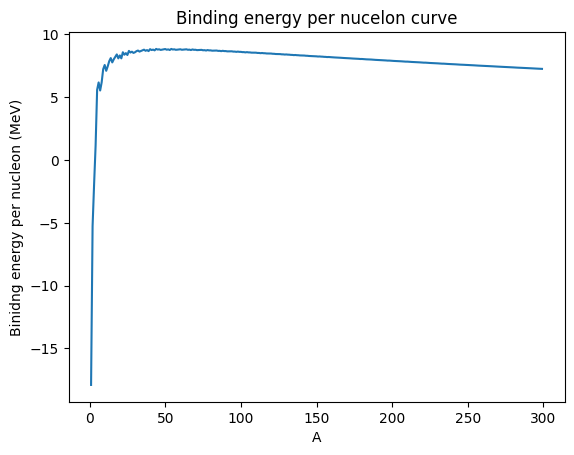

In [21]:
import numpy as np
import matplotlib.pyplot as plt #import matplotlib.pyplot first

def bind_en (A):
    avol=14.1
    asurf=13
    acol=0.595
    asym=19

    Z=(A/2)*(1/(1+0.25*(A**(2/3))*(acol/asym)))
    Z=int(Z)
    if (A%2)!=0 and (Z%2)==0:
        apar=0
    elif (A%2)==0 and (Z%2)!=0:
        apar=0
    elif (A%2)==0 and (Z%2)==0:
        apar=33.5
    elif (A%2)!=0 and (Z%2)!=0:
        apar=-33.5

    b = avol*A-asurf*(A**(2/3))-(acol*Z*(Z-1))/(A**(1/3))-asym*((A-2*Z)**2)/A+apar/(A**(3/4))

    return b/A

A=np.arange(1,300,1)
BE=[]

for a in A:
    be=bind_en(a)
    BE.append(be)

plt.plot(A, BE)
plt.xlabel('A')   #We may use these fucntions to add title, labels etc.
plt.ylabel('Binidng energy per nucleon (MeV)')
plt.title('Binding energy per nucelon curve')

-ash